In [1]:
import sympy as sm
import sympy.physics.mechanics as me

In [2]:
me.init_vprinting()

In [3]:
x, v = me.dynamicsymbols('x v')
m, c, k, g, t = sm.symbols('m c k g t')

In [4]:
ceiling = me.ReferenceFrame('C')

In [5]:
O = me.Point('O')
P = me.Point('P')

In [6]:
O.set_vel(ceiling, 0)

In [7]:
P.set_pos(O, x * ceiling.x)
P.set_vel(ceiling, v * ceiling.x)
P.vel(ceiling)

In [8]:
damping = -c * P.vel(ceiling)
stiffness = -k * P.pos_from(O)
gravity = m * g * ceiling.x
forces = damping + stiffness + gravity
forces

In [9]:
zero = me.dot(forces - m * P.acc(ceiling), ceiling.x)
zero

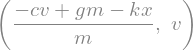

In [10]:
dv_by_dt = sm.solve(zero, v.diff(t))[0]
dx_by_dt = v
dv_by_dt, dx_by_dt

In [11]:
mass = me.Particle('mass', P, m)

In [12]:
kane = me.KanesMethod(ceiling, q_ind=[x], u_ind=[v], kd_eqs=[v - x.diff(t)])

In [13]:
fr, frstar = kane.kanes_equations([mass], loads=[(P, forces)])
fr, frstar

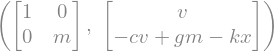

In [14]:
M = kane.mass_matrix_full
f = kane.forcing_full
M, f

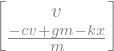

In [15]:
M.inv() * f

In [16]:
from pydy.system import System
sys = System(kane)

In [17]:
sys.constants = {m:10.0, g:9.8, c:5.0, k:10.0}
sys.initial_conditions = {x:0.0, v:0.0}

In [18]:
from numpy import linspace
fps = 60
duration = 10.0
sys.times = linspace(0.0, duration, num=int(duration*fps))

In [19]:
x_trajectory = sys.integrate()

In [20]:
from pydy.viz import *

In [21]:
bob = Sphere(2.0, color="red", name='bob')
bob_vframe = VisualizationFrame(ceiling, P, bob)

In [22]:
ceiling_circle = Circle(radius=10, color="white", name='ceiling')
rotated = ceiling.orientnew("C_R", 'Axis', [sm.pi/2, ceiling.y])
ceiling_vframe = VisualizationFrame(rotated, O, ceiling_circle)

In [23]:
scene = Scene(ceiling, O, system=sys)

In [24]:
scene.visualization_frames = [bob_vframe, ceiling_vframe]

In [25]:
scene.display_jupyter(axes_arrow_length=5.0)